<a href="https://colab.research.google.com/github/MirandaCR/TEC/blob/main/Proyecto%20Final/Avance1_Equipo20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<div align="left">
  <img src="https://brandemia.org/sites/default/files/sites/default/files/tec_monterrey_nuevo_logo.png" width="500" height="300">
</div>

# **Proyecto Integrador**


## Integrantes:
 <ul>
      <li>Alfonso Garibay</li>
      <li>Cristian Miranda</li>
       <li>Jaik Yocks</li>
 </ul>


# **Descripción del Proyecto**

En este trabajo, se presenta información de distintas iniciativas de un banco para el 2024. Lo que se busca es implementar un algoritmo que permita realizar un ranking de iniciativas a partir de distintas visiones de datos para poder generar una propuesta de portafolio de valor en base a restricciones presupuestarias que maximizen la utilidad del ente financiero.

## **Modulos**

In [47]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## **Carga de Datos**

Se inicia con la carga de los datos que se encuentran en un repositorio en Github

In [40]:
url = "https://github.com/MirandaCR/TEC/raw/main/Proyecto%20Final/Dataset.xlsx"

df = pd.read_excel(url)
df.rename(columns={"Columna1":"Tipo"},inplace=True)
df.head()

,Visión,GRAN APUESTA,OBJETIVO ESTRATÉGICO,INICIATIVA,Ejecutor(es),FTEs,CAPEX,Impacto (Estimación del beneficio para los Objetivos Estratégicos),Tipo,Impacto Ingresos,Impacto Ahorros,Impacto Tiempo,Tiempo de Retorno,Fecha Inicio,Fecha Fin,Proyecto Activable,Tiempo,SELECCIONADO
0,Deuda Técnica,"Disminuir Deuda técnica de seguridad, tecnolog...",Interés Deuda Técnica,INI_01,Varias,6.0,49490100.0,NaN,SIN IMPACTO,NaN,NaN,NaN,3.0,NaT,NaT,NaN,NaN,Si
1,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Ingreso no Financieros \n(Serv & Com / Ingreso...,INI_02,Empresas (Recursos),9.0,10797840.0,"Ingresos No Financieros 2,8 MM a 3 años.\nAño...",VAN,2800000.0,NaN,NaN,3.0,2024-01-01,2025-01-01,NaN,NaN,No
2,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Ingreso no Financieros \n(Serv & Com / Ingreso...,INI_03,PYMES (Recursos),15.0,10697860.0,VAN: 11 MM a 5 años \nAño 0: 0 MM\nAño 1: 2....,VAN,11000000.0,NaN,NaN,5.0,2024-04-01,2025-01-01,NaN,NaN,No
3,Presupuesto de Proyecto,Cobranzas,Ratio Vencida,INI_04,Riesgo de Crédito,0.0,2999400.0,Caso,SIN IMPACTO,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,No
4,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Participación de Mercado \n(Obligaciones con e...,INI_05,CoE Datos & Analítica| Segmentos y Negocios Di...,7.0,2519496.0,"2,5MM Ingresos Operacionales netos \nAño 1: 2...",INGRESO OPERACIONAL,2500000.0,NaN,NaN,3.0,2024-01-01,2024-09-01,NaN,NaN,No


## Estructura de datos
A continuación se procede a realizar la primer revisión de datos en cuanto a sus dimensiones y tipos

In [41]:
print("Filas:", df.shape[0], "\nColumnas:",df.shape[1])

Filas: 97 
Columnas: 18


In [42]:
pd.DataFrame(df.dtypes).rename({0:"Tipo"},axis="columns")

,Tipo
Visión,object
GRAN APUESTA,object
OBJETIVO ESTRATÉGICO,object
INICIATIVA,object
Ejecutor(es),object
FTEs,float64
CAPEX,float64
Impacto (Estimación del beneficio para los Objetivos Estratégicos),object
Tipo,object
Impacto Ingresos,float64


In [44]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
FTEs,97.0,6.512887,0.0,0.0,2.0,10.0,42.0,9.564499
CAPEX,97.0,5644647.0025,0.0,0.0,0.0,8310337.6,49490100.0,10076829.329014
Impacto Ingresos,32.0,35346087.875,113850.0,953000.0,4150000.0,21150000.0,450000000.0,89122345.255051
Impacto Ahorros,9.0,9139377.777778,86400.0,568000.0,1700000.0,6000000.0,61300000.0,19765677.491157
Impacto Tiempo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiempo de Retorno,35.0,2.571429,1.0,1.0,3.0,3.0,5.0,1.266903
Fecha Inicio,59,2023-12-11 02:50:50.847457536,2022-04-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-03-01 00:00:00,2024-07-01 00:00:00,NaN
Fecha Fin,49,2024-10-23 07:50:12.244898048,2024-02-01 00:00:00,2024-09-01 00:00:00,2024-12-01 00:00:00,2024-12-31 00:00:00,2025-09-01 00:00:00,NaN


Se cuentan con 18 variables relacionadas a proyectos que se pueden resumir de la siguiente forma:

- Gran Apuesta: Relacionada a la estrategia del banco
- Objetivo Estratégico: Métrica a la que se apunta
- Iniciativa: Proyecto por ser aprobado-ejecutado
- Ejecutores: Equipos Involucrados en la iniciativa
- FTEs: Recursos (personas) necesarias para ejecutar la iniciativa
- CAPEX: Monto necesario de Inversión
- Impacto: Retorno que se espera de la iniciativa
- Tipo: Tipo de Impacto a recibir
- Impacto Ingresos: Cantidad de Ingresos en caso de que el impacto sea monetario
- Impacto Ahorros: Cantidad de ahorros USD en caso de que el impacto sea normativo o de eficiencia
- Impacto Tiempo: Tiempo a reducir en caso de que el impacto esté relacionado a reducir tiempos
- Tiempo de Retorno: Tiempo en años del retorno de la inversión
- Fecha Inicio: Fecha estimada de inicio del proyecto
- Fecha Fin: Fecha estimada del fin del proyecto
- Tiempo: Tiempo total de ejecución de la iniciativa
- Seleccionado: Variable que determina si el proyecto fue seleccionado

## Correción de Variables
Con lo anterior, es evidente que las fechas de los proyectos no esta completa por lo que se procede a completar esta información considerando que todos deben arrancar máximo el Q3 del año en curso y terminar 1 año posterior. Adicionalmente, se corrige la variable de tiempo de ejecución

In [88]:
date_end = pd.to_datetime("01/06/2025")
date_start = pd.to_datetime("01/06/2024")
df["Fecha Inicio"] = df["Fecha Inicio"].fillna(date_start)
df["Fecha Fin"] = df["Fecha Fin"].fillna(date_end)
df["Tiempo"] = abs((df['Fecha Fin'] - df['Fecha Inicio']) // np.timedelta64(1, 'M')) + 1


## **Valores Faltantes**

Ahora, se procede a revisar valores faltantes del dataset para posteriormente darles tratamiento

In [125]:
# Tabla de Nulos por variable
nulo = pd.DataFrame(df.isnull().sum()).rename({0:"Total"}, axis='columns')
nulo['Porcentaje'] = (nulo.Total*100/len(df)).round(2)
nulo.sort_values(by=['Total'], inplace=True, ascending=False)
nulo

,Total,Porcentaje
Impacto Monetario,97,100.00
Impacto Tiempo,97,100.00
Impacto Ahorros,88,90.72
Impacto Ingresos,65,67.01
Tiempo de Retorno,62,63.92
Impacto (Estimación del beneficio para los Objetivos Estratégicos),11,11.34
OBJETIVO ESTRATÉGICO,4,4.12
Ejecutor(es),0,0.00
FTEs,0,0.00
CAPEX,0,0.00


<Axes: >

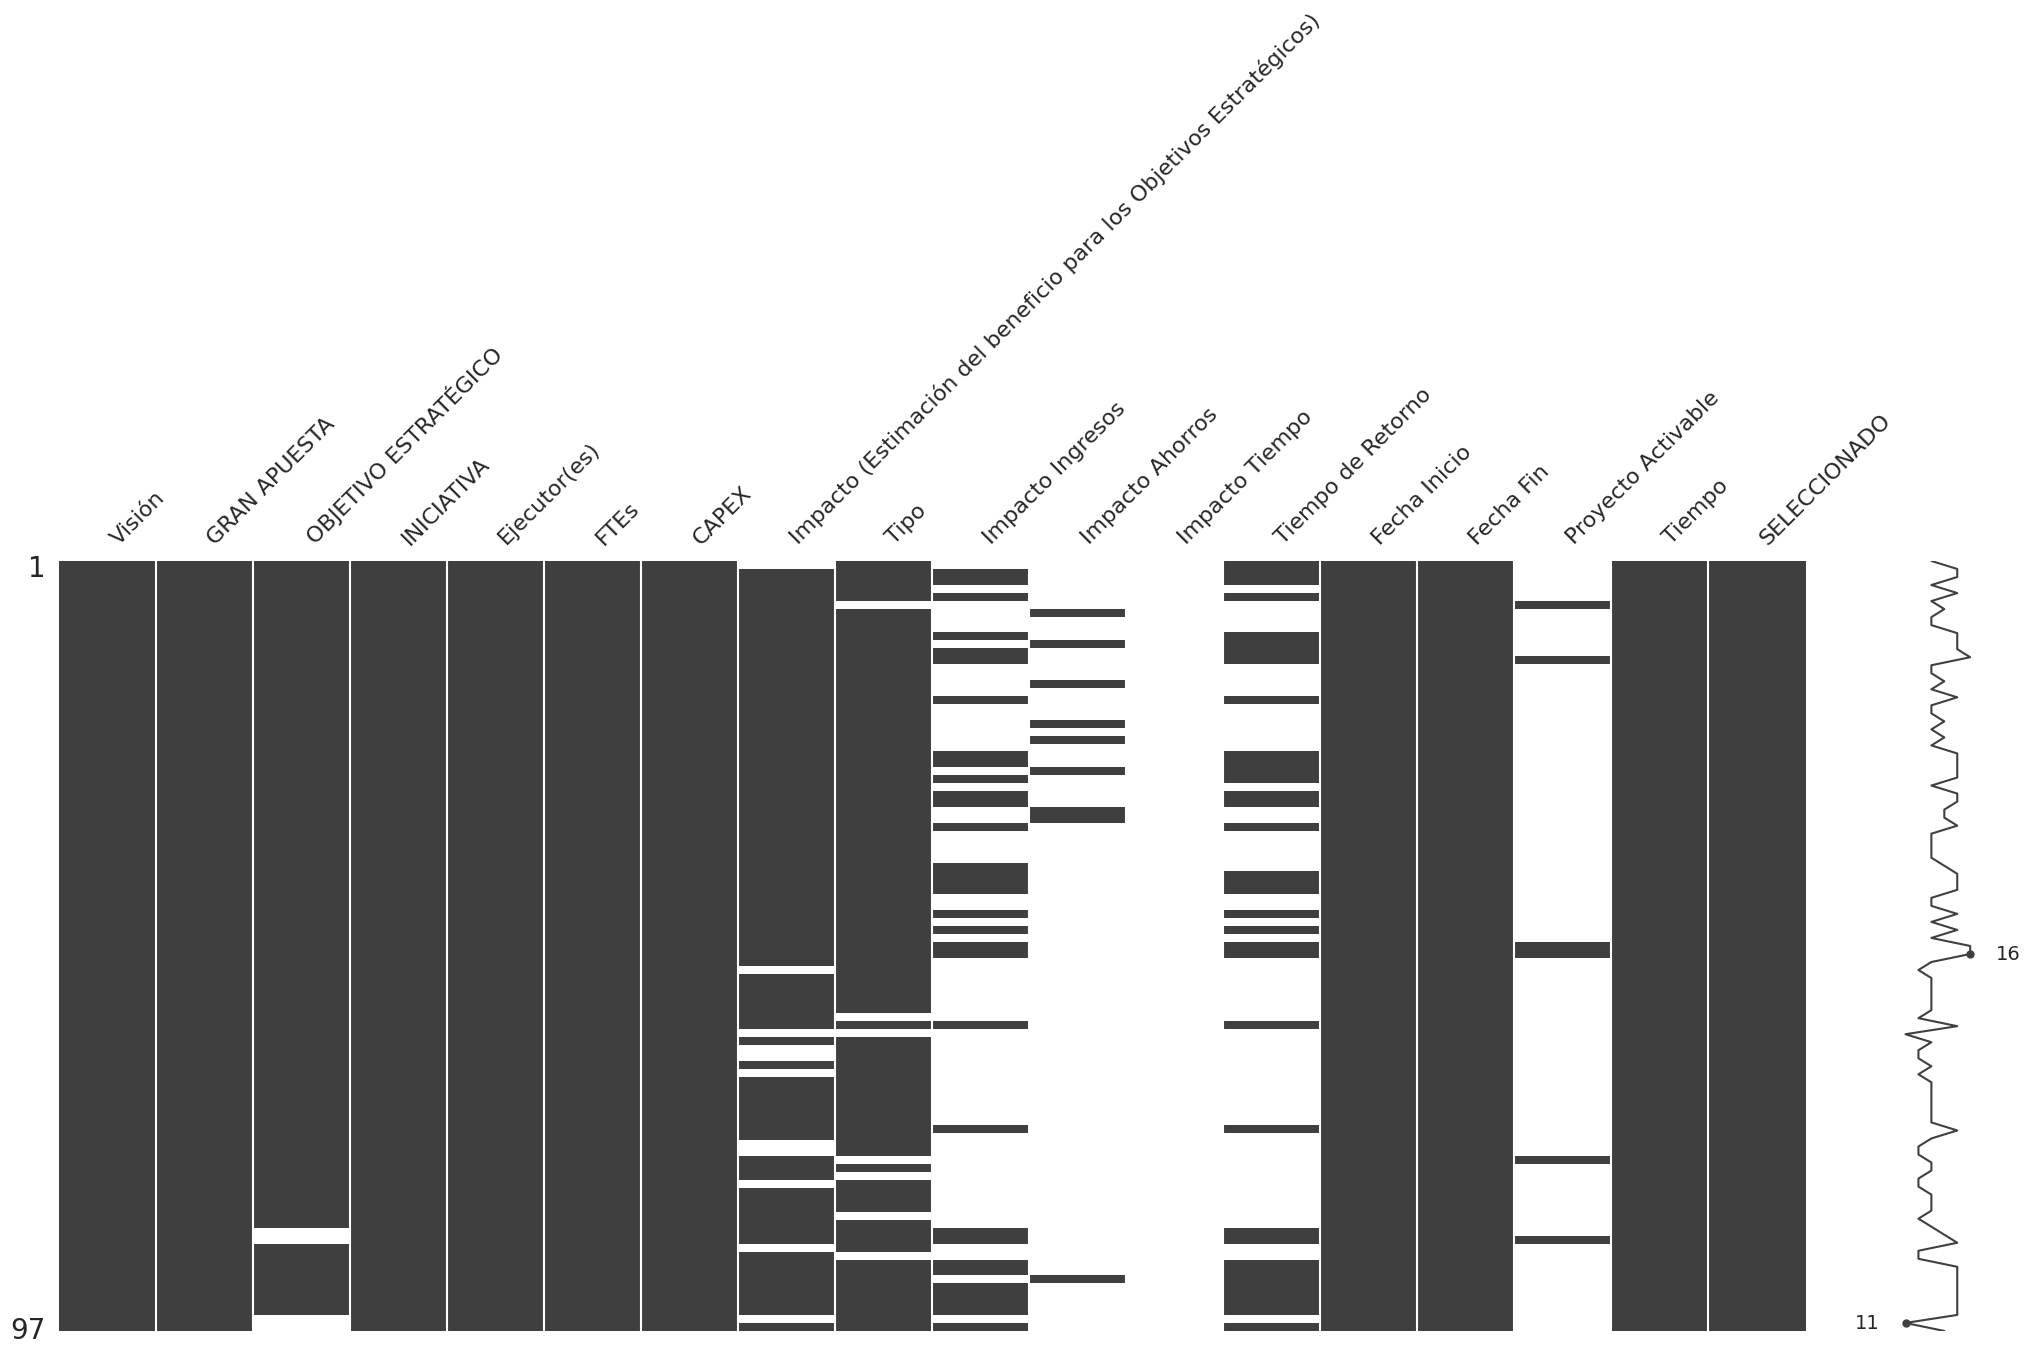

In [90]:
# Valores faltantes en todo el dataset
msno.matrix(df)

<Axes: >

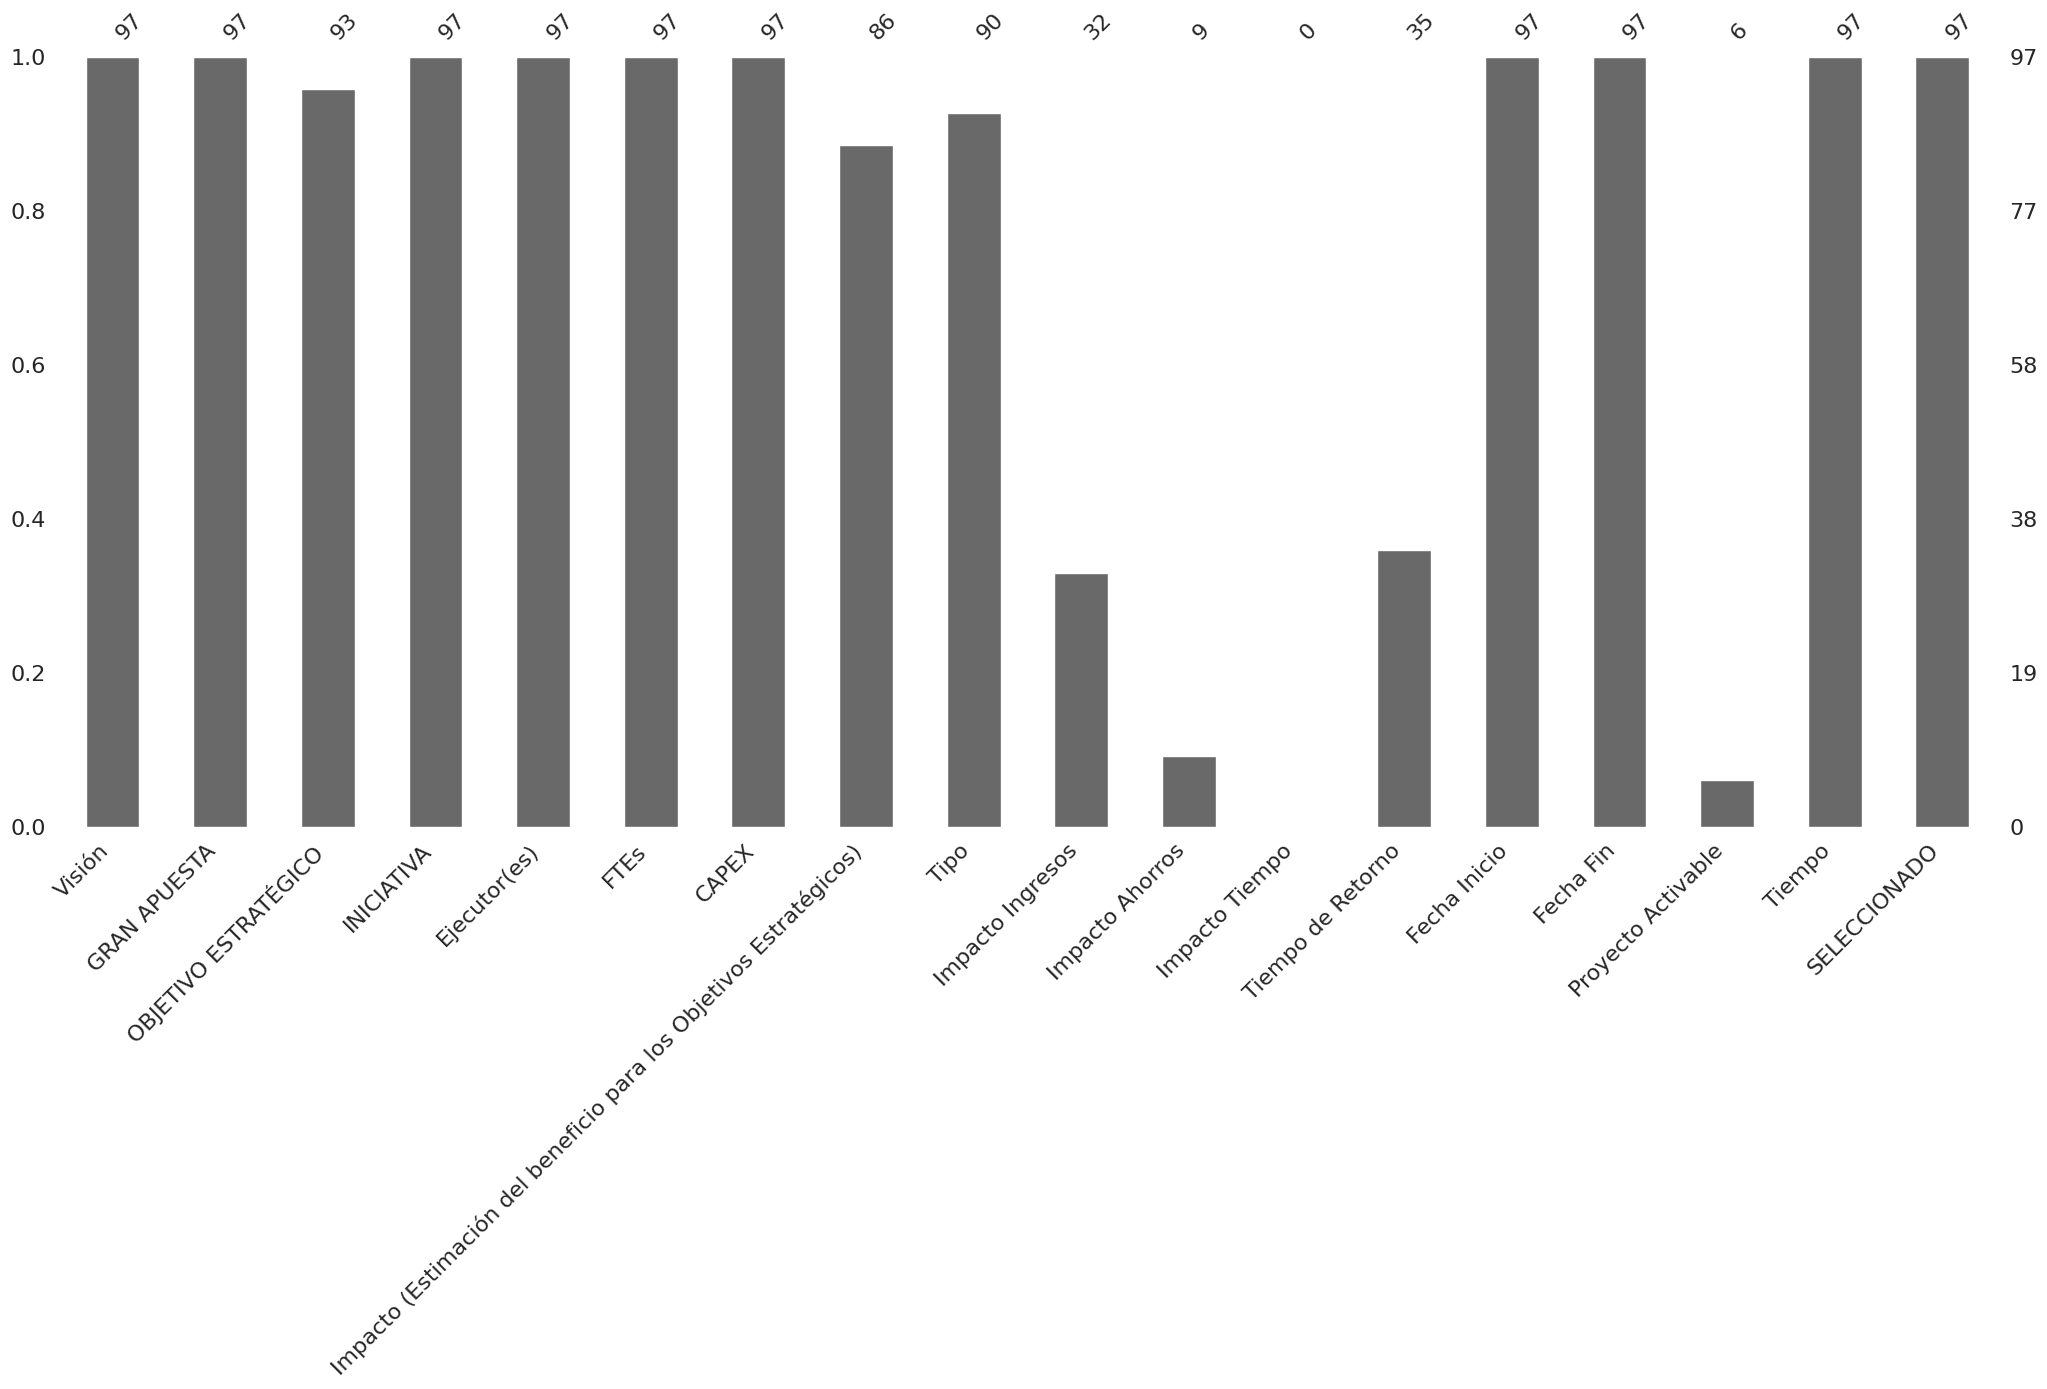

In [91]:
# Valores faltantes por variables
msno.bar(df)

Los gráficos previos permiten determinar que algunas variable como el impacto, si un proyecto es activable y los tiempos de retorno son los que más problemas tienen por lo que se procederá más adelante a corregir

## **Descriptivos**
En este punto, se procede a realizar un análisis visual de las distintas variables considerando caracteristicas estadisticas como su correlación, atípicos y relaciones

<Axes: >

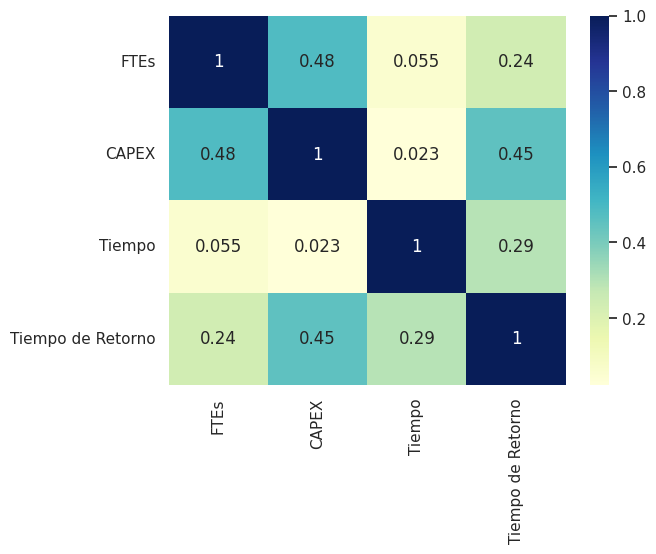

In [94]:
# Correlacion de variables
corr = df[["FTEs","CAPEX","Tiempo","Tiempo de Retorno"]].corr(method='spearman')

sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
           annot=True)


<ipython-input-120-b66632991a0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GRAN APUESTA", y="CAPEX", data=df, palette="RdGy").get_legend()


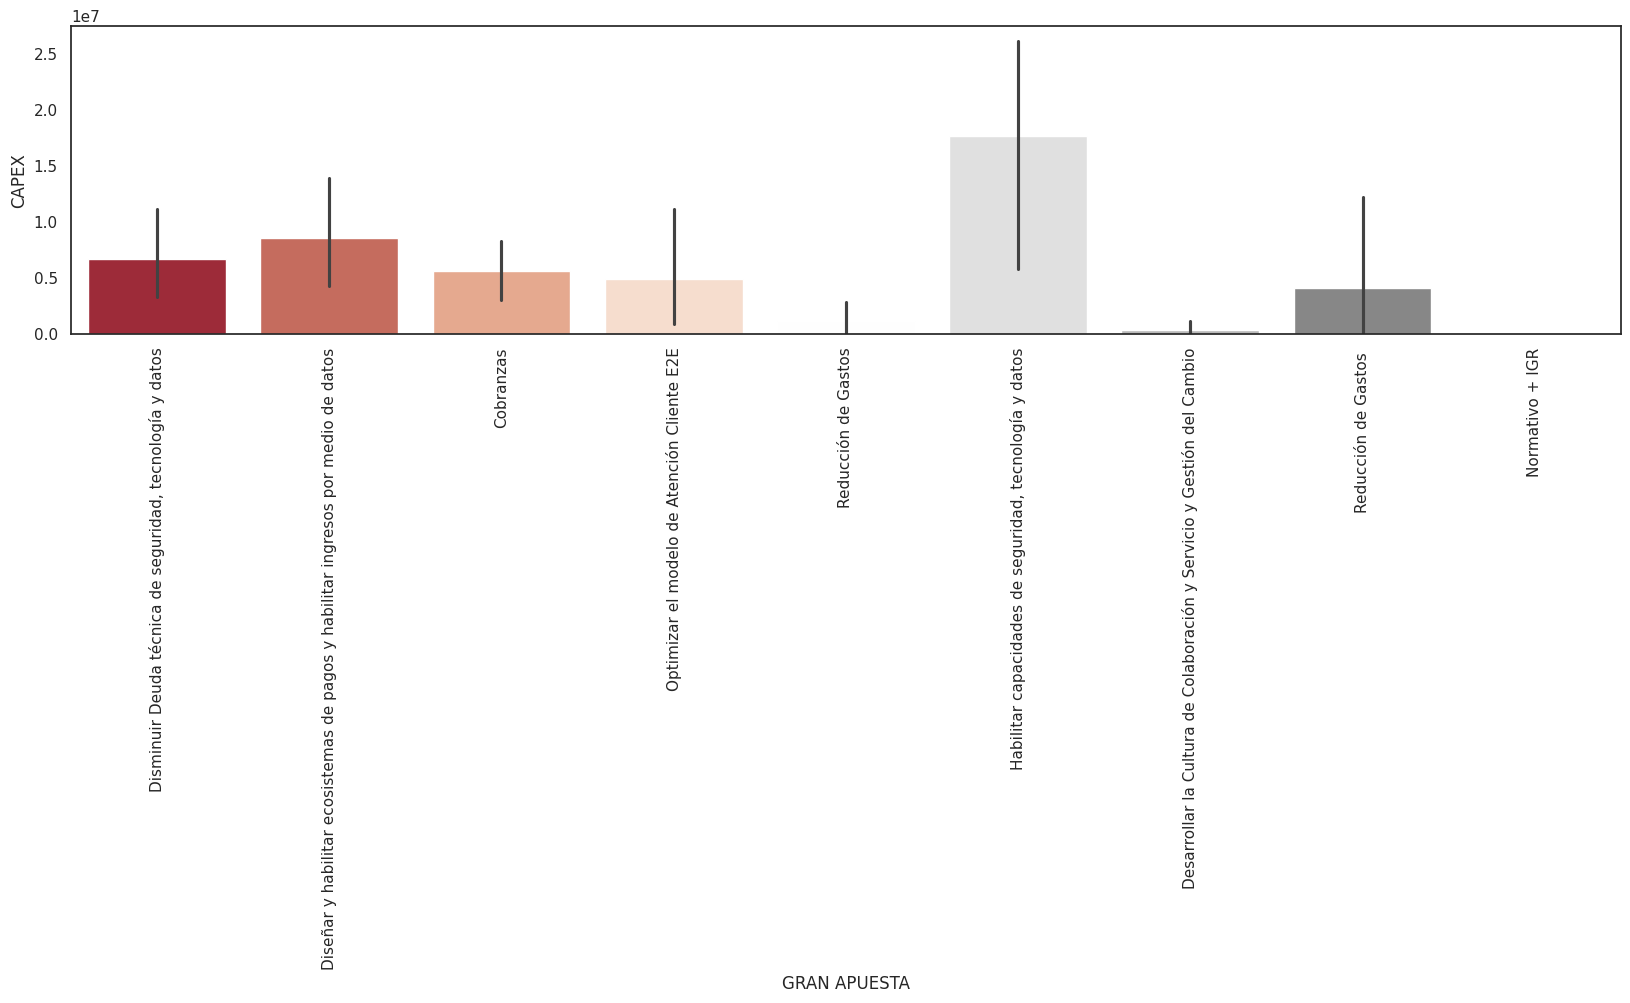

In [120]:
# CAPEX por Gran Apuesta
plt.figure(figsize=(20,4))
sns.set(style="white",font_scale=1)
sns.barplot(x="GRAN APUESTA", y="CAPEX", data=df, palette="RdGy").get_legend()
plt.xticks(rotation=90)
plt.show()

<ipython-input-119-2d809dbe275e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GRAN APUESTA", y="FTEs", data=df, palette="RdGy").get_legend()


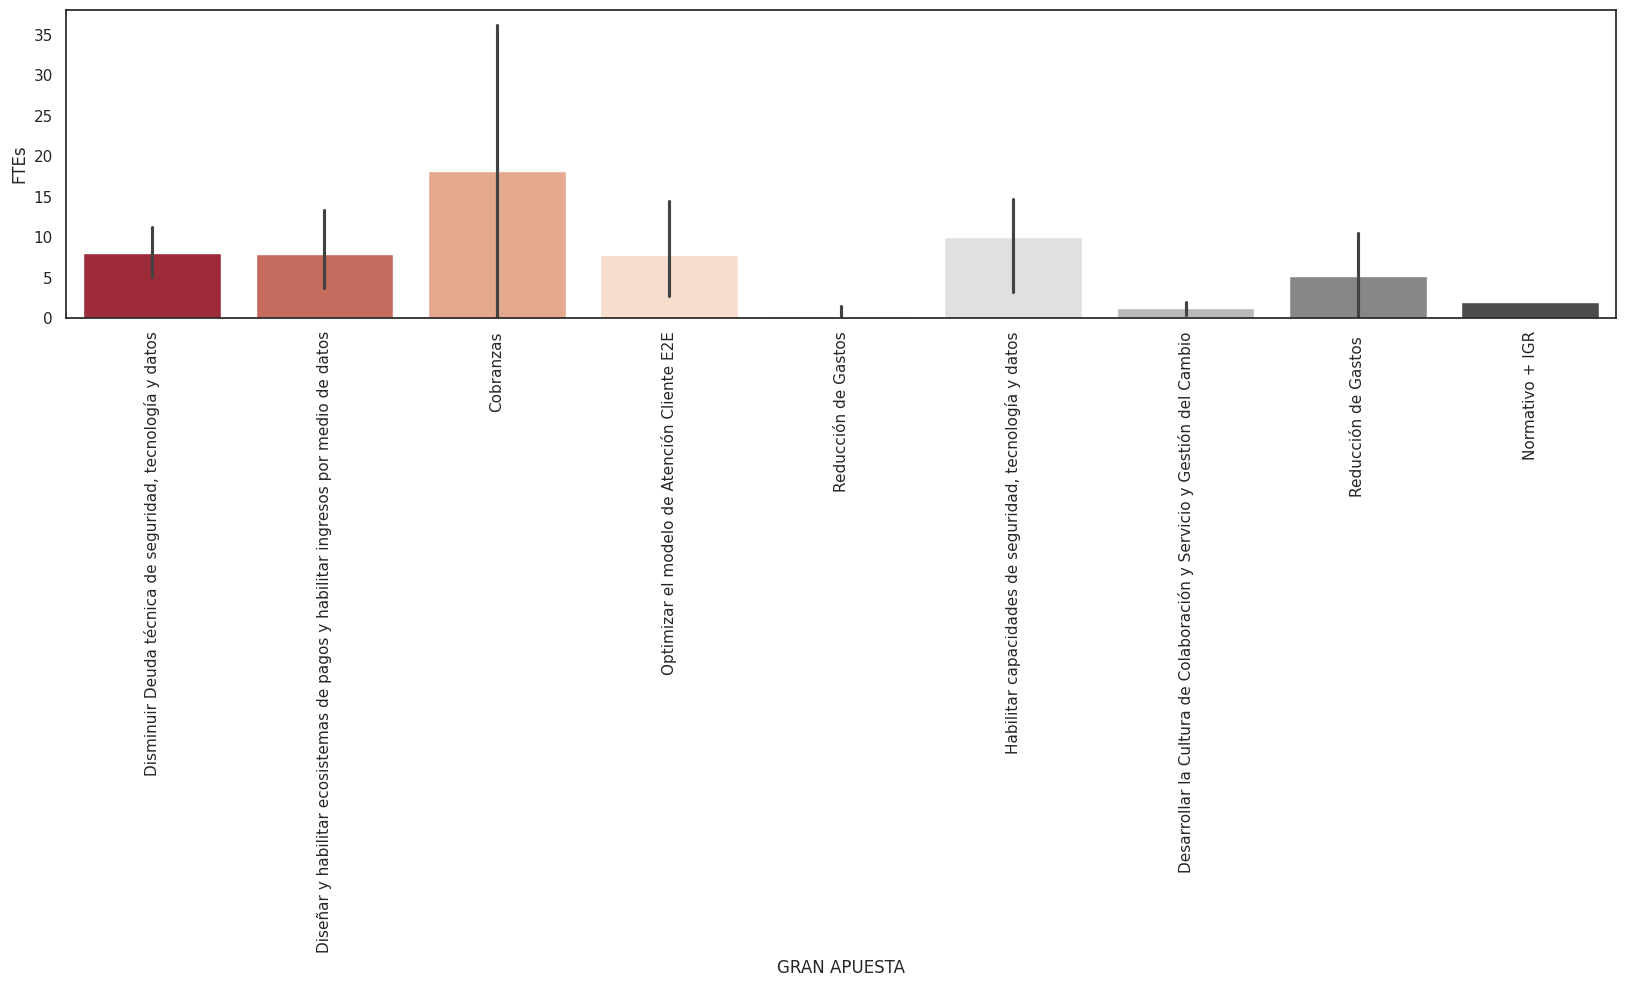

In [119]:
# FTEs por Gran Apuesta
plt.figure(figsize=(20,4))
sns.set(style="white",font_scale=1)
sns.barplot(x="GRAN APUESTA", y="FTEs", data=df, palette="RdGy").get_legend()
plt.xticks(rotation=90)
plt.show()

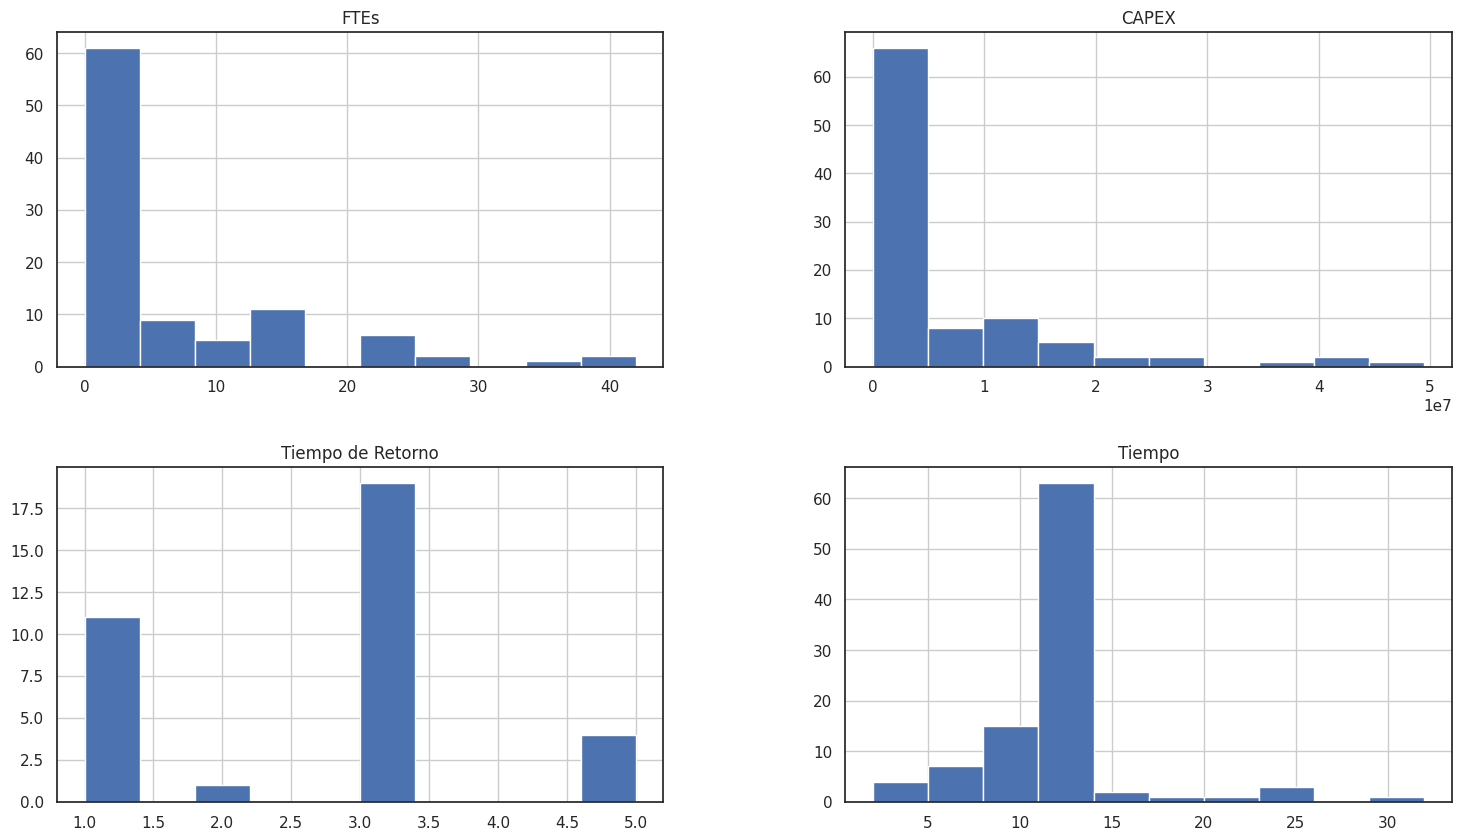

In [103]:
# Histogramas
df[["FTEs","CAPEX","Tiempo de Retorno","Tiempo"]].hist(figsize=(18, 10))
plt.show()

<Axes: >

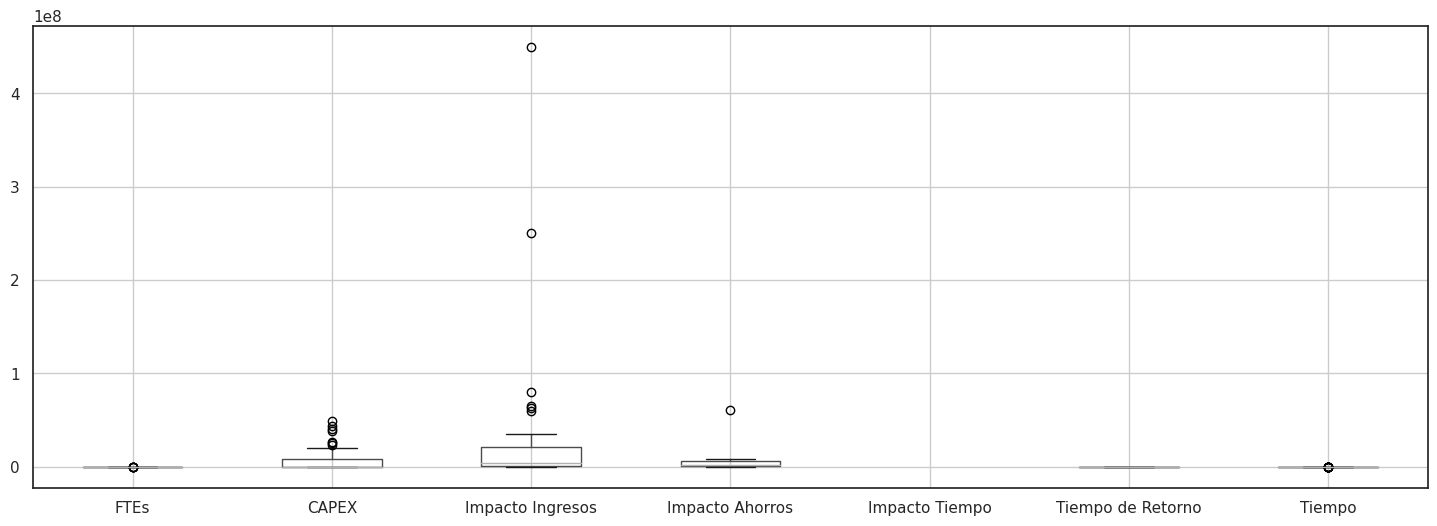

In [101]:
# Valores Atipicos
df.boxplot(figsize=(18, 6))

## Correción y Transformación de Otras Variables

In [124]:
df["Proyecto Activable"] = np.where(df["CAPEX"]>1000000,1,0)
df["Impacto Monetario"] = df["Impacto Ingresos"] + df["Impacto Ahorros"]
df["Impacto Monetario"] =
df["Tipo"] = df["Tipo"].fillna("TBD")